<h1>Iris Flower Classifiction Using Machine Learning</h1>

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline




In [2]:
!kaggle datasets download uciml/iris

Dataset URL: https://www.kaggle.com/datasets/uciml/iris
License(s): CC0-1.0




  0%|          | 0.00/3.60k [00:00<?, ?B/s]
100%|██████████| 3.60k/3.60k [00:00<00:00, 622kB/s]


In [4]:
from zipfile import ZipFile


with ZipFile('./iris.zip', 'r') as zip_ref:
    zip_ref.extractall(".")


In [5]:
iris_df = pd.read_csv('./Iris.csv')

In [6]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_species = iris_df['Species'].unique()
iris_species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:

iris_df['Species'] = iris_df['Species'].astype('category').cat.codes



In [9]:
iris_df.drop(['Id'],axis=1,inplace=True)

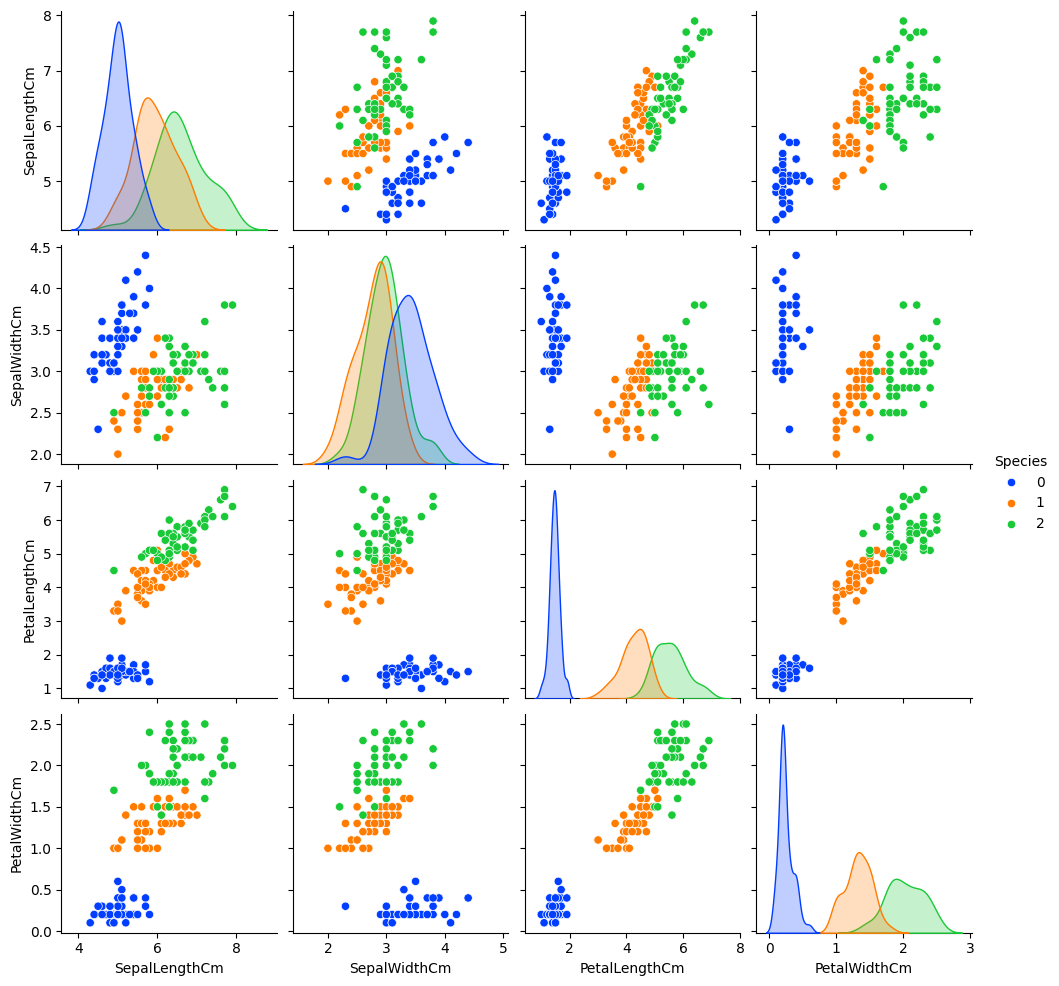

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("bright")  

sns.pairplot(iris_df, hue='Species', palette=palette)
plt.show()

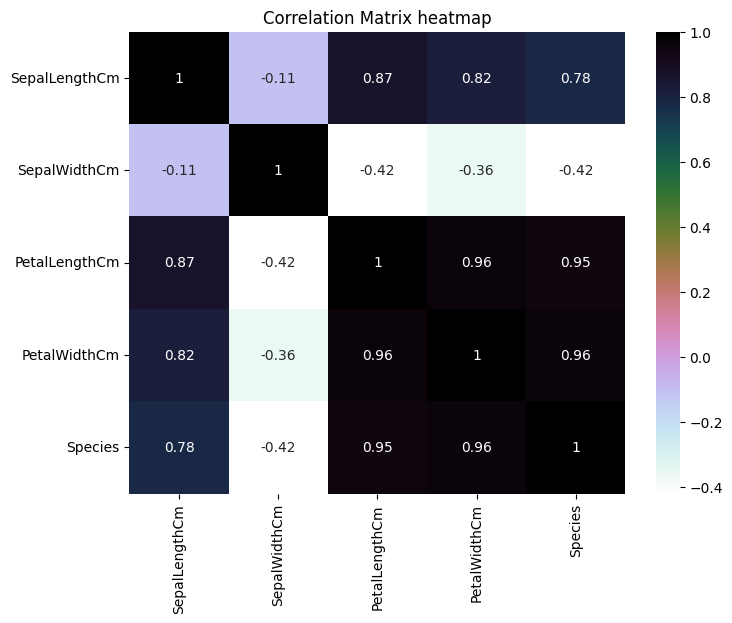

In [14]:
plt.figure(figsize=(8,6))
plt.title('Correlation Matrix heatmap')
sns.heatmap(iris_df.corr(),annot=True,cmap='cubehelix_r')
plt.show()

In [15]:
X_train,X_test, Y_train,Y_test = train_test_split(iris_df.iloc[:,0:4],iris_df['Species'],test_size=0.2,random_state=32)


In [16]:
param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 1.0, 10],
        'classifier__max_iter': [100, 200]
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1.0, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 150],
        'classifier__max_depth': [None, 10, 20]
    },
    {
        'classifier': [DecisionTreeClassifier()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    }
]

In [17]:
pipeline = Pipeline([
    ('classifier', LogisticRegression())  # Placeholder, overwritten by param_grid
])

In [18]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier', LogisticRegression())]),
             param_grid=[{'classifier': [LogisticRegression()],
                          'classifier__C': [0.1, 1.0, 10],
                          'classifier__max_iter': [100, 200]},
                         {'classifier': [SVC()],
                          'classifier__C': [0.1, 1.0, 10],
                          'classifier__kernel': ['linear', 'rbf']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [None, 10, 20],
                          'classifier__n_estimators': [50, 100, 150]},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__max_depth': [None, 10, 20],
                          'classifier__min_samples_split': [2, 5, 10]}],
             scoring='accuracy')

In [19]:
print("Best model and parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best model and parameters: {'classifier': SVC(), 'classifier__C': 1.0, 'classifier__kernel': 'linear'}
Best cross-validation score: 0.975


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate the classification report
class_report = classification_report(Y_test, y_pred)
print("\nClassification Report:\n", class_report)

NameError: name 'confusion_matrix' is not defined

In [20]:
results_df = pd.DataFrame(grid_search.cv_results_)

results_df = results_df[['params', 'mean_test_score', 'rank_test_score']]
print(results_df.sort_values(by='rank_test_score').head(3))

                                              params  mean_test_score  \
8  {'classifier': SVC(), 'classifier__C': 1.0, 'c...         0.975000   
5  {'classifier': LogisticRegression(), 'classifi...         0.958333   
4  {'classifier': LogisticRegression(), 'classifi...         0.958333   

   rank_test_score  
8                1  
5                2  
4                2  


In [21]:
print("\nBottom 10 parameter combinations:")
print(results_df.sort_values(by='mean_test_score').head(3))


Bottom 10 parameter combinations:
                                               params  mean_test_score  \
7   {'classifier': SVC(), 'classifier__C': 0.1, 'c...            0.900   
28  {'classifier': DecisionTreeClassifier(), 'clas...            0.925   
21  {'classifier': DecisionTreeClassifier(), 'clas...            0.925   

    rank_test_score  
7                30  
28               26  
21               26  
